In [1]:
import pandas as pd
import altair as alt
import plotly.express as px

### Data Import

In [2]:
filepath = "/Users/noahrae-grant/nohrg/MRFRS-stats-analysis/data/clean/"
applications = pd.read_csv(filepath + "applications.csv", index_col=0)
adoptions = pd.read_csv(filepath + "adopter.csv", index_col=0)
calendar = pd.read_csv(filepath + "calendar.csv")


catdata = pd.read_csv(filepath + "catdata.csv", index_col=0)
hardtoplace = pd.read_csv(filepath + "hardtoplace.csv", index_col=0)

### Summary Statistics

In [3]:
applications.shape

(8251, 11)

In [4]:
applications.head()

,Application ID,Application Type,Application Received Date/Time,Status,Application Status Date/Time,Application Note,Person ID,City,State,County,Zip
0,4444701,Cat Adoption Application,"01/01/2021, 6:54 am",Accepted,"03/05/2022, 12:10 pm",—,MER-P-17076,Groveland,MA,MA,01834
1,4444702,Cat Adoption Application,"01/01/2021, 8:34 am",Accepted,"03/05/2022, 11:55 am",—,MER-P-17075,Lawrence,MA,Essex,01841
2,4444703,Cat Adoption Application,"01/01/2021, 11:22 am",Accepted,"03/05/2022, 11:54 am",—,MER-P-17074,Mattapan,MA,United states,02126
3,4444704,Cat Adoption Application,"01/01/2021, 3:27 pm",Accepted,"03/05/2022, 11:53 am",—,MER-P-17073,Lynnfield,MA,NaN,01940
4,4444705,Cat Adoption Application,"01/01/2021, 3:51 pm",Accepted,"03/05/2022, 11:51 am",—,MER-P-17072,Methuen,MA,NaN,01844


In [5]:
applications.columns

Index(['Application ID', 'Application Type', 'Application Received Date/Time',
       'Status', 'Application Status Date/Time', 'Application Note',
       'Person ID', 'City', 'State', 'County', 'Zip'],
      dtype='object')

In [6]:
applications["Year"] = pd.to_datetime(applications["Application Received Date/Time"], format='mixed').dt.year

In [7]:
applications["Year"].value_counts()

Year
2021    1892
2023    1844
2024    1747
2022    1700
2025    1068
Name: count, dtype: int64

In [8]:
applications["City and State"] = applications["City"] + ", " + applications["State"]

In [9]:
applications["City and State"].value_counts()

City and State
Haverhill, MA          590
Amesbury, MA           477
Newburyport, MA        380
Salisbury, MA          253
Boston, MA             175
                      ... 
Center Sandwich, NH      1
Warren, NH               1
Fresno, NH               1
Ashaway, RI              1
Georgetown, ME           1
Name: count, Length: 563, dtype: int64

In [10]:
adoptions.shape

(3053, 15)

In [11]:
adoptions.head()

,Date Of Adoption,Animal ID,Animal Name,Species,Primary Breed,Sex,Altered,Est. Birthdate,Microchip Number,By (User),Outcome Subtype,Adopter ID,City,State,Zip
0,01/03/2021,MER-A-158,Oberon,Cat,Domestic Medium Hair,Male,Yes,06/01/2015,985112007171202,mer_jmccormack,Adoption,MER-P-14391,Danvers,MA,01923
1,01/03/2021,MER-A-70,Cleopatra,Cat,Domestic Medium Hair,Female,Yes,11/05/2013,985141002756186,mer_jmccormack,Adoption,MER-P-14392,Hampton,NH,03842
2,01/06/2021,MER-A-130,Princess,Cat,Domestic Shorthair,Female,Yes,11/24/2013,985141002878981,mer_jmccormack,Adoption,MER-P-14394,Kingston,NH,03848
3,01/09/2021,MER-A-114,Mugshot,Cat,Domestic Shorthair,Male,Yes,10/06/2018,985112010662548,mer_jmccormack,Adoption,MER-P-14397,Ayer,MA,01432
4,01/12/2021,MER-A-159,Simon,Cat,Domestic Shorthair,Male,Yes,12/30/2012,985141002879119,mer_jmccormack,Adoption,MER-P-14428,Brighton,MA,02135


In [12]:
adoptions["City and State"] = adoptions["City"] + ", " + adoptions["State"]

In [13]:
adoptions["City and State"].value_counts()

City and State
Haverhill, MA           239
Amesbury, MA            224
Newburyport, MA         173
Salisbury, MA           110
Hampton, NH              67
                       ... 
Rockland, MA              1
Weare, NH                 1
Marshfield Hills, NH      1
South Portland, ME        1
Georgetown, ME            1
Name: count, Length: 284, dtype: int64

# Adoption Policy

## Q1: Are there patterns to adoption applicants that can be used for targeted marketing efforts in communities?

In [14]:
def alt_pie_chart(data, name_field, value_field, title):

    base = alt.Chart(
        data,
        title = title
    ).encode(
        alt.Theta(value_field).stack(True),
        alt.Color(name_field).scale(scheme="category20")
    )
    
    pie = base.mark_arc(
        outerRadius=150,
        opacity=0.9,
        stroke='black',
        strokeOpacity=0.5
    )

    text = base.mark_text(
        radius=165, size=15
    ).encode(
        text=value_field
    ).properties(
        height = 400
    )

    return (text + pie).configure_legend(
        orient="right",
        offset=250,
        symbolStrokeWidth=0
    )

In [15]:
city_counts = applications["City and State"].value_counts().reset_index()
city_counts = city_counts.rename(columns={"count":"Applications"})

In [16]:
city_counts.loc[city_counts['Applications'] < 10, 'City and State'] = 'Other'

In [17]:
alt_pie_chart(city_counts, "City and State", "Applications", "Test")

alt.LayerChart(...)

In [18]:
alt_pie_chart(city_counts[:20], "City and State", "Applications", "The 20 cities with the most adoption applications")

alt.LayerChart(...)

In [19]:
alt_pie_chart(city_counts[20:39], "City and State", "Applications", "21st-39th cities with the most adoption applications")

alt.LayerChart(...)

In [20]:
sum(city_counts[city_counts["Applications"] > 50]["Applications"])/sum(city_counts["Applications"])

0.6069350145489816

In [21]:
relevant_apps = city_counts[city_counts["Applications"] > 50]
relevant_apps

,City and State,Applications
0,"Haverhill, MA",590
1,"Amesbury, MA",477
2,"Newburyport, MA",380
3,"Salisbury, MA",253
4,"Boston, MA",175
5,"Hampton, NH",153
6,"Exeter, NH",145
7,"Seabrook, NH",135
8,"Merrimac, MA",135
9,"North Andover, MA",124


In [22]:
adopt_counts = adoptions["City and State"].value_counts().reset_index()
adopt_counts = adopt_counts.rename(columns={"count":"Adoptions"})

In [23]:
relevant_adopts = adopt_counts[adopt_counts["City and State"].isin(relevant_apps["City and State"].unique())].reset_index()

In [24]:
relevant_adopts

,index,City and State,Adoptions
0,0,"Haverhill, MA",239
1,1,"Amesbury, MA",224
2,2,"Newburyport, MA",173
3,3,"Salisbury, MA",110
4,4,"Hampton, NH",67
5,5,"Exeter, NH",62
6,6,"Merrimac, MA",62
7,7,"Seabrook, NH",56
8,8,"North Andover, MA",52
9,9,"Ipswich, MA",51


In [25]:
alt_pie_chart(relevant_adopts[:20], "City and State", "Adoptions", "Adoption counts (top 20 cities)")

alt.LayerChart(...)

In [26]:
alt_pie_chart(relevant_adopts[20:], "City and State", "Adoptions", "Adoption counts (top 21st-39th cities)")

alt.LayerChart(...)

In [27]:
sum(relevant_adopts["Adoptions"])/sum(adopt_counts["Adoptions"])

0.6778105539167486

In [28]:
relevant_apps = relevant_apps.sort_values('City and State')
relevant_adopts = relevant_adopts.sort_values('City and State')

In [30]:
expected_apps = relevant_apps['Applications'].to_numpy()
expected_apps = expected_apps/sum(expected_apps)

actual_adopts = relevant_adopts['Adoptions'].to_numpy()
actual_adopts = actual_adopts/sum(actual_adopts)

In [64]:
relevant_adopts

,index,City and State,Adoptions
1,1,"Amesbury, MA",224
30,31,"Andover, MA",28
14,14,"Beverly, MA",46
22,22,"Boston, MA",35
37,40,"Brighton, MA",20
33,34,"Byfield, MA",23
31,32,"Cambridge, MA",28
10,10,"Danvers, MA",51
18,18,"Derry, NH",38
13,13,"Dover, NH",46


np.float64(0.013539651837524178)

In [41]:
from scipy.stats import bartlett,levene,skewtest,chisquare

chisquare(actual_adopts, expected_apps)

Power_divergenceResult(statistic=np.float64(0.03877390372781829), pvalue=np.float64(1.0))

In [63]:
bartlett(actual_adopts, expected_apps)

BartlettResult(statistic=np.float64(0.19555701265288056), pvalue=np.float64(0.6583312548318754))

In [38]:
levene(actual_adopts, expected_apps)

LeveneResult(statistic=np.float64(0.030268376196947912), pvalue=np.float64(0.8623452710796098))

In [40]:
skewtest(expected_apps)

SkewtestResult(statistic=np.float64(5.264785297364779), pvalue=np.float64(1.403532852523277e-07))

#### Rejections

In [45]:
rejections = '. '.join(applications[applications['Status'] == 'Denied']['Application Note'].values)

In [93]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab')

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(rejections.lower())

# additionally want to remove certain domain words or misc unhelpful words
domain_words = ['cat', 'kitten', 'adoption', 'etc', 'said', 'says', 'goes', 'take', 'sure', 'y/o', '-cm', 'joan']
stop_words = stop_words.union(domain_words)

filtered_tokens = [word.strip() for word in tokens if word not in stop_words]
filtered_tokens = [token for token in filtered_tokens if len(token) > 2]

[nltk_data] Downloading package punkt_tab to /Users/noahrae-
[nltk_data]     grant/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/noahrae-
[nltk_data]     grant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/noahrae-
[nltk_data]     grant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


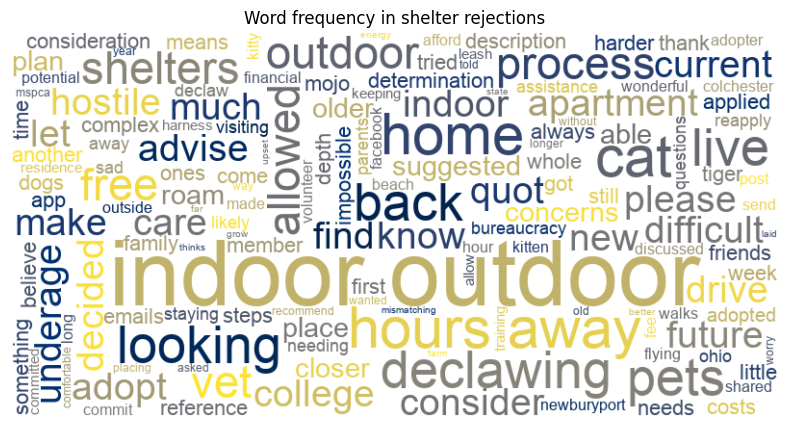

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="#FFFFFF", 
                      colormap='cividis', 
                      font_path="/System/Library/Fonts/Supplemental/Arial.ttf").generate(' '.join(filtered_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Word frequency in shelter rejections", )
plt.show()

In [91]:
from collections import Counter
Counter(filtered_tokens)

Counter({'indoor/outdoor': 19,
         'away': 6,
         'would': 5,
         'hours': 5,
         'home': 5,
         'cats': 4,
         'looking': 4,
         'declawing': 4,
         'pets': 4,
         'back': 4,
         'outdoor': 3,
         'process': 3,
         'vet': 3,
         'allowed': 3,
         'get': 3,
         'free': 3,
         'shelters': 3,
         'much': 2,
         'let': 2,
         'adopt': 2,
         'please': 2,
         'advise': 2,
         'quot': 2,
         'live': 2,
         'future': 2,
         'care': 2,
         'apartment': 2,
         'hostile': 2,
         'difficult': 2,
         'make': 2,
         'new': 2,
         '...': 2,
         'find': 2,
         'underage': 2,
         'lives': 2,
         'college': 2,
         'current': 2,
         'consider': 2,
         'decided': 2,
         'indoor': 2,
         'drive': 2,
         'suggested': 2,
         'closer': 2,
         'concerns': 2,
         'able': 2,
         'plan': 2,

In [105]:
applications[(applications['Status'] == 'Denied') & (applications['Application Note'] == '—')]['City'].values

array(['Amesbury', 'West Newbury', 'Eliot', 'Newbury', 'Acton',
       'West Newbury', 'South Hamilton', 'Georgetown', 'Newbury',
       'Plaistow', 'Eliot', 'Middleton', 'Amesbury', 'Chichester',
       'Ashburnham', 'East Kingston', 'Newburyport', 'Dover',
       'West Newbury', 'Fremont', 'Somersworth', 'Boxford', 'Manchester',
       'Kittery Point', 'Ipswich', 'Windham', 'Rochester', 'Haverhill',
       'Methuen', 'East Kingston', 'Groveland', 'Gorham', 'Chelmsford',
       'Stratham', 'Salisbury', 'Atkinson', 'Hampton Falls', 'Amesbury',
       'Chestnut Hill', 'Nashua', 'Salisbury', 'Merrimac', 'Salem',
       'Lowell', 'Bellingham', 'Wellesley', 'North Reading', 'Seabrook',
       'Newburyport', 'Millbury', 'Kensington', 'Boston', 'Newburyport',
       'Hampton', 'Woburn', 'Ipswich', 'Lowell', 'Amesbury', 'Lynn',
       'Portsmouth', 'Lawrence', 'Topsfield', 'Newburyport', 'Amesbury',
       'Newton', 'Andover', 'Medford', 'North Andover', 'Stratham',
       'Round Rock', 'Ames

## Q2: What adoption patterns can MRFRS capitalize on to more successfully adopt out cats with behavioral and medical issues?

## Q3: Are adoption events more effective than ”business as usual”?